# 보스턴 주택 가격 데이터세트

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

In [2]:
print(len(train_X), len(test_X))

404 102


In [3]:
print(train_X[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [4]:
print(train_Y[0])

15.2


In [5]:
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

In [6]:
y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

In [7]:
print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

2021-11-15 08:51:56.963787: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

2021-11-15 09:14:23.875701: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/25
10/10 [==============================] - 0s 11ms/step - loss: 1.8689 - val_loss: 0.7844
Epoch 2/25
10/10 [==============================] - 0s 2ms/step - loss: 0.4818 - val_loss: 0.3441
Epoch 3/25
10/10 [==============================] - 0s 2ms/step - loss: 0.2269 - val_loss: 0.2585
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1442 - val_loss: 0.2397
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1489 - val_loss: 0.2442
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1660 - val_loss: 0.2787
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1258 - val_loss: 0.1792
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1393 - val_loss: 0.2733
Epoch 9/25
10/10 [==============================] - 0s 7ms/step - loss: 0.2052 - val_loss: 0.2262
Epoch 10/25
10/10 [==============================] - 0s 2ms/step - loss: 0.1737 - val_loss: 0.2199
Epoch 11/25
10/10 

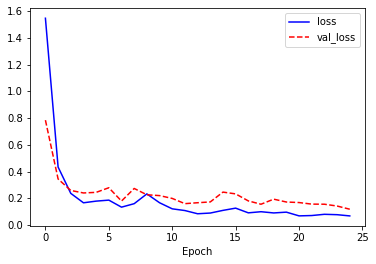

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 983us/step - loss: 0.2778


0.2778494358062744

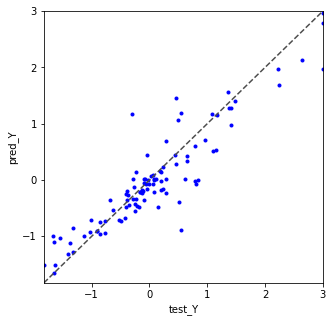

In [16]:
pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()